In [38]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [39]:
np.set_printoptions(precision=4,suppress=4)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [25]:
cars=pd.read_excel("C:/Users/Purva Sawant/Desktop/Swarm/Cars_HClustering.xlsx")
cars.columns=['Make','Model','Year','FuelType','HP','Cyl','TT','Wheel','Doors','Category','Size','Style','HMPG','CMPG','Popularity','MSRP']

In [30]:
x=cars.ix[:,(12,13,15)].values
y=cars.ix[:,6].values

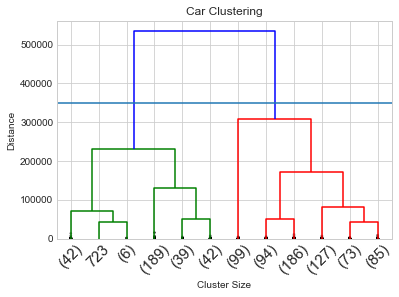

In [35]:
z=linkage(x,'ward')
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('Car Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=350000)

In [48]:
k=2
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(x)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000001F97F681378>)

In [55]:
k

2

In [45]:
x

array([[  24,   17, 2000],
       [  24,   17, 2000],
       [  20,   16, 2000],
       ...,
       [  24,   17, 4976],
       [  24,   17, 4697],
       [  25,   17, 4755]], dtype=int64)

In [47]:
y2=np.where(y=='MANUAL',0,1)

In [50]:
sm.accuracy_score(y2,Hclustering.labels_)

0.4486266531027467

In [52]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y2,Hclustering.labels_)

0.26754832146490337

98.1